## Standard

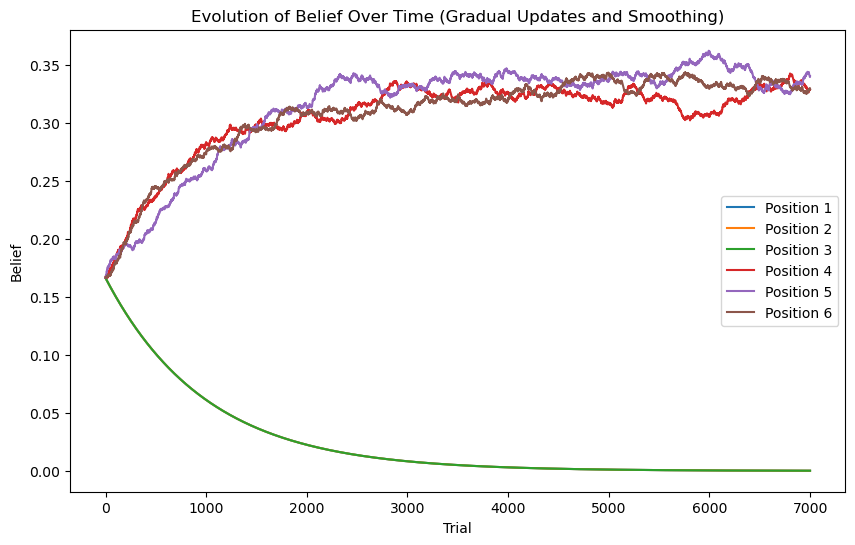

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define positions and observations
positions = np.arange(6)  # Positions 0 through 5 (corresponding to 1-6 in problem)
observations = ['Deviant', 'No deviant']

# Step 1: Initialize prior belief (biased towards position 4)
def initialize_prior():
    prior_belief = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])  # Example prior belief
    return prior_belief

# Step 2: Gradually update the prior based on the observed deviant location with recency-based decay
def update_prior_simplified(prior_belief, deviant_position, deviant_history, alpha):
    # Track the recent history of deviants
    deviant_history.append(deviant_position)
    
    # Initialize the updated prior as a copy of the original prior
    updated_prior = prior_belief.copy()

    for pos in range(len(prior_belief)):
        Ct = 0
        if (deviant_position == pos):
            Ct = 1

        updated_prior[pos] = alpha * Ct + (1 - alpha) * updated_prior[pos]


    return updated_prior, deviant_history

# Step 3: Run trials and update beliefs
def run_trials(n_trials, alpha):
    belief_over_time = []  # Store belief at each trial
    deviant_history = []  # Track history of observed deviants
    
    # Initialize prior belief (even distribution across all positions initially)
    prior_belief = initialize_prior()
    
    # Perform the trials
    for trial in range(n_trials):        
        # Randomly choose where the deviant is located (uniform distribution over 6 positions)
        deviant_position = np.random.randint(3, 6)
        
        # After each trial, update the prior based on the deviant position observed in the current trial (gradual update)
        prior_belief, deviant_history = update_prior_simplified(prior_belief, deviant_position, deviant_history, alpha)
        
        # Record the belief after this trial
        belief_over_time.append(prior_belief.copy())
    
    return np.array(belief_over_time), deviant_history

# Step 4: Plot the belief evolution over time
def plot_belief_evolution(belief_over_time):
    plt.figure(figsize=(10, 6))
    for i in range(6):
        plt.plot(belief_over_time[:, i], label=f"Position {i+1}")
    
    plt.xlabel("Trial")
    plt.ylabel("Belief")
    plt.title("Evolution of Belief Over Time (Gradual Updates and Smoothing)")
    plt.legend()
    plt.show()


# Step 5: Run the trials and visualize the belief evolution
n_trials = 7000  # Number of trials to simulate
belief_over_time, deviant_positions = run_trials(n_trials, alpha=0.001)

# Plot the belief evolution over time
plot_belief_evolution(belief_over_time)

## Catch

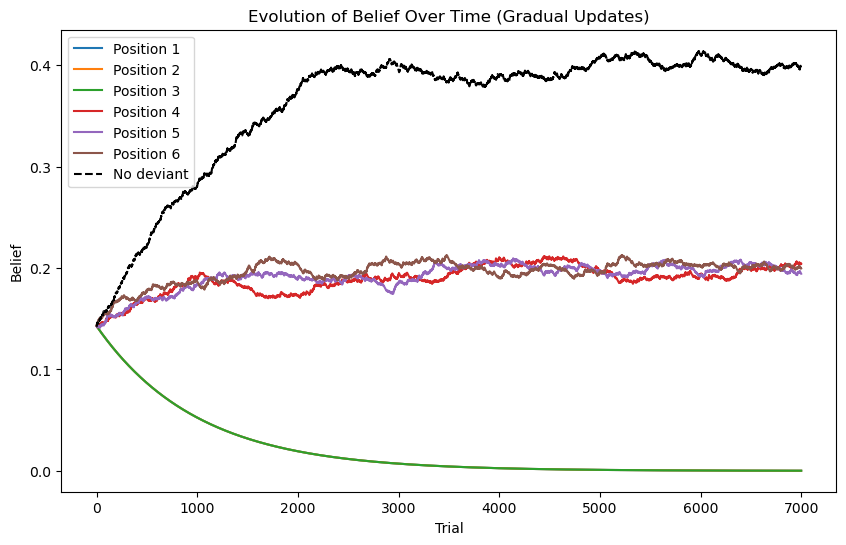

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define positions and observations
positions = np.arange(6)  # Positions 0 through 5 (corresponding to 1-6 in problem)
observations = ['Deviant', 'No deviant']

# Step 1: Initialize prior belief (biased towards position 4)
def initialize_prior():
    prior_belief = np.array([1/7, 1/7, 1/7, 1/7, 1/7, 1/7, 1/7])  # Example prior belief
    return prior_belief

# Step 2: Gradually update the prior based on the observed deviant location with recency-based decay
def update_prior_simplified(prior_belief, deviant_position, deviant_history, alpha):
    # Track the recent history of deviants
    deviant_history.append(deviant_position)
    
    # Initialize the updated prior as a copy of the original prior
    updated_prior = prior_belief.copy()

    for pos in range(len(prior_belief)):
        Ct = 0
        if (deviant_position == pos):
            Ct = 1

        updated_prior[pos] = alpha * Ct + (1 - alpha) * updated_prior[pos]


    return updated_prior, deviant_history

# Step 3: Run trials and update beliefs
def run_trials(n_trials, alpha):
    belief_over_time = []  # Store belief at each trial
    deviant_history = []  # Track history of observed deviants
    
    # Initialize prior belief (even distribution across all positions initially)
    prior_belief = initialize_prior()
    
    # Perform the trials
    for trial in range(n_trials):        
        # Randomly choose where the deviant is located (uniform distribution over 6 positions)
        positions = [3, 4, 5, 6]
        probabilities = [0.6/3, 0.6/3, 0.6/3, 0.4]  # 60% for positions 3, 4, 5; 40% for position 7
        deviant_position = np.random.choice(positions, size=1, p=probabilities)
        
        # After each trial, update the prior based on the deviant position observed in the current trial (gradual update)
        prior_belief, deviant_history = update_prior_simplified(prior_belief, deviant_position, deviant_history, alpha)
        
        # Record the belief after this trial
        belief_over_time.append(prior_belief.copy())
    
    return np.array(belief_over_time), deviant_history

# Step 4: Plot the belief evolution over time
def plot_belief_evolution(belief_over_time):
    plt.figure(figsize=(10, 6))
    
    # Loop through positions, but label position 7 as "No deviant"
    for i in range(6):  # Only plot positions 1 through 6 (0 to 5)
        plt.plot(belief_over_time[:, i], label=f"Position {i+1}")
    
    # Plot position 7 as "No deviant"
    plt.plot(belief_over_time[:, 6], label="No deviant", linestyle='dashed', color='black')

    plt.xlabel("Trial")
    plt.ylabel("Belief")
    plt.title("Evolution of Belief Over Time (Gradual Updates)")
    plt.legend()
    plt.show()


# Step 5: Run the trials and visualize the belief evolution
n_trials = 7000  # Number of trials to simulate
belief_over_time, deviant_positions = run_trials(n_trials, alpha=0.001)

# Plot the belief evolution over time
plot_belief_evolution(belief_over_time)